<a href="https://colab.research.google.com/github/SnooperAlex/Big-Data-and-Machine-Learning/blob/main/Image_Data_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import keras
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(32, 32, 3, 1000)


In [ ]:
train_hog_features = []

for i in range(10000):
  image = train_images[:,:,:,i]
  hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
  train_hog_features.append(hog_feature)

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

The extracted feature vector is of length 15876 per sample


In [ ]:
test_hog_features = []
for i in range(1000):
  image = test_images[:, :, :, i]
  hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
  test_hog_features.append(hog_feature)

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

The extracted feature vector is of length 15876 per sample


In [ ]:
test_hog_features = np.array(test_hog_features)
train_hog_features = np.array(train_hog_features)
test_hog_features.shape

(1000, 15876)

SVM

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_hog_features)
test_data = scaler.transform(test_hog_features)

In [ ]:
model = SVC(C = 1, kernel = 'linear')
model.fit(train_data, train_labels)

predicted = model.predict(test_data)
scoring = model.score(test_data, test_labels)
print(scoring)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.408


Text(0, 0.5, 'Feature Dimension 4')

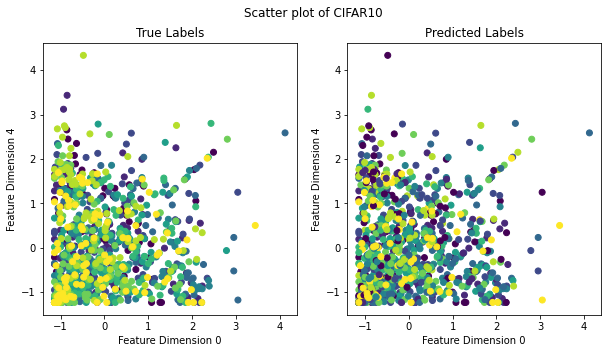

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Scatter plot of CIFAR10")
ax[0].scatter(test_data[:,0], test_data[:,4], c = test_labels)

ax[0].set_title("True Labels")
ax[0].set_xlabel("Feature Dimension 0")
ax[0].set_ylabel("Feature Dimension 4")

ax[1].scatter(test_data[:,0], test_data[:,4], c = predicted)

ax[1].set_title("Predicted Labels")
ax[1].set_xlabel("Feature Dimension 0")
ax[1].set_ylabel("Feature Dimension 4")


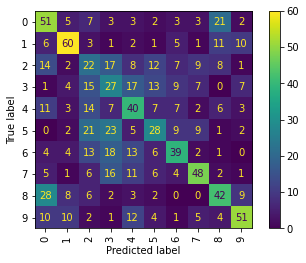

In [ ]:
true_labels = np.argmax(test_labels, axis=1)

confusion_mtx = confusion_matrix(true_labels, predicted)
ConfusionMatrixDisplay.from_predictions(test_labels, predicted, xticks_rotation='vertical')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_labels, predicted))

Accuracy: 0.408


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.509
Accuracy: 0.509


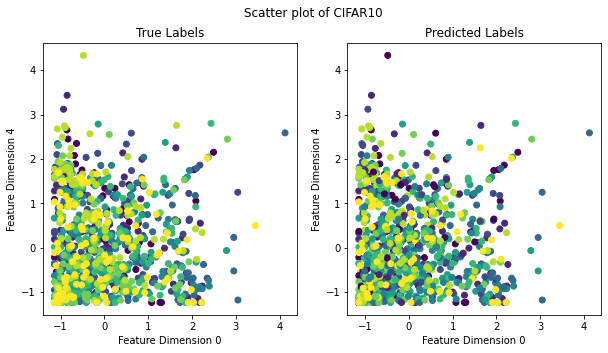

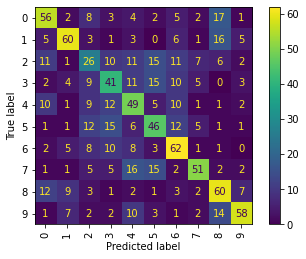

In [ ]:
model = SVC(C = 1, kernel = 'rbf')
model.fit(train_data, train_labels)

predicted = model.predict(test_data)
scoring = model.score(test_data, test_labels)
print(scoring)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Scatter plot of CIFAR10")
ax[0].scatter(test_data[:,0], test_data[:,4], c = test_labels)

ax[0].set_title("True Labels")
ax[0].set_xlabel("Feature Dimension 0")
ax[0].set_ylabel("Feature Dimension 4")

ax[1].scatter(test_data[:,0], test_data[:,4], c = predicted)

ax[1].set_title("Predicted Labels")
ax[1].set_xlabel("Feature Dimension 0")
ax[1].set_ylabel("Feature Dimension 4")

true_labels = np.argmax(test_labels, axis=1)

confusion_mtx = confusion_matrix(true_labels, predicted)
ConfusionMatrixDisplay.from_predictions(test_labels, predicted, xticks_rotation='vertical')

print("Accuracy:",metrics.accuracy_score(test_labels, predicted))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.511
Accuracy: 0.511


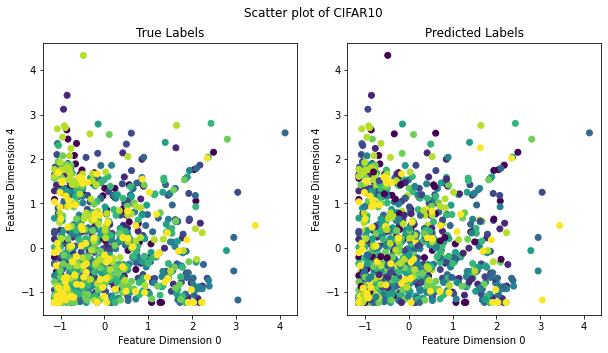

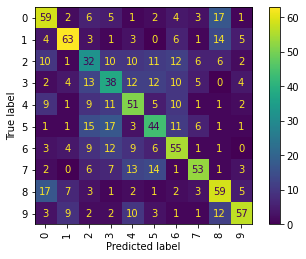

In [ ]:
model = SVC(C = 10, kernel = 'rbf')
model.fit(train_data, train_labels)

predicted = model.predict(test_data)
scoring = model.score(test_data, test_labels)
print(scoring)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Scatter plot of CIFAR10")
ax[0].scatter(test_data[:,0], test_data[:,4], c = test_labels)

ax[0].set_title("True Labels")
ax[0].set_xlabel("Feature Dimension 0")
ax[0].set_ylabel("Feature Dimension 4")

ax[1].scatter(test_data[:,0], test_data[:,4], c = predicted)

ax[1].set_title("Predicted Labels")
ax[1].set_xlabel("Feature Dimension 0")
ax[1].set_ylabel("Feature Dimension 4")

true_labels = np.argmax(test_labels, axis=1)

confusion_mtx = confusion_matrix(true_labels, predicted)
ConfusionMatrixDisplay.from_predictions(test_labels, predicted, xticks_rotation='vertical')

print("Accuracy:",metrics.accuracy_score(test_labels, predicted))


Convolutional Neural Network

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(test_labels)), activation = "softmax"),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 2.0810 - sparse_categorical_accuracy: 0.2265 - val_loss: 1.8567 - val_sparse_categorical_accuracy: 0.3268
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7699 - sparse_categorical_accuracy: 0.3533 - val_loss: 1.6322 - val_sparse_categorical_accuracy: 0.4091
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5896 - sparse_categorical_accuracy: 0.4205 - val_loss: 1.5510 - val_sparse_categorical_accuracy: 0.4546
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4870 - sparse_categorical_accuracy: 0.4659 - val_loss: 1.3881 - val_sparse_categorical_accuracy: 0.5037
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4178 - sparse_categorical_accuracy: 0.4928 - val_loss: 1.3308 - val_sparse_categorical_accuracy: 0.5229
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.

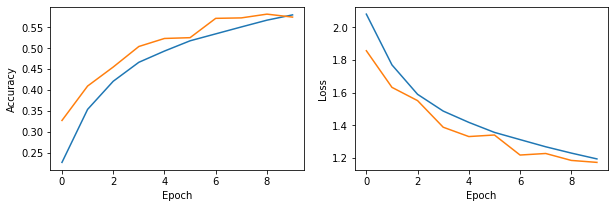

313/313 [==============================] - 5s 15ms/step - loss: 1.1726 - sparse_categorical_accuracy: 0.5740


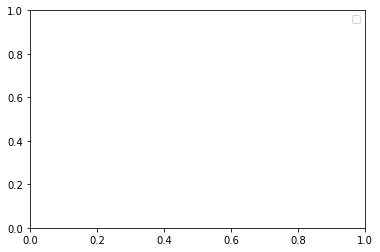

In [ ]:
plt.figure(figsize = [10, 3])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()
plt.legend()
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 3s 8ms/step


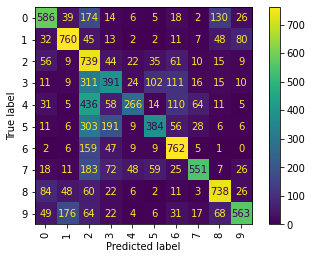

In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

c_matrix = confusion_matrix(true_labels, predictions)
ConfusionMatrixDisplay.from_predictions(test_labels, predictions, xticks_rotation='vertical')